## DOWLAODING THE DATASET FROM GOOGLE DRIVE AND UNZIPING IT



In [15]:
# Install gdown if not already installed
!pip install gdown

# Use gdown to download the file
import gdown

file_id = '1yQ6bR6sqwUKX20zU1w7vTErzFrScdKeY'
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'myfile.zip', quiet=False)

# Unzip the downloaded file
!unzip myfile.zip -d destination_folder

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1yQ6bR6sqwUKX20zU1w7vTErzFrScdKeY
From (redirected): https://drive.google.com/uc?export=download&id=1yQ6bR6sqwUKX20zU1w7vTErzFrScdKeY&confirm=t&uuid=80b2665d-387b-49af-a0d6-20c48c40e40f
To: /content/myfile.zip
100%|██████████| 437M/437M [00:14<00:00, 30.7MB/s]


Archive:  myfile.zip
replace destination_folder/test/Sheep/OIP--SmXJlkSW5VPiDpIRt9PFQHaFj.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## READING THE FILES FROM THE DIRECTORY


In [16]:
import os
def walk_through_dir(dirname):
  #Walk through Directory and list number of files
  for dirpath, dirnames, filenames in os.walk(dirname):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

In [17]:
#Listing the folders that are present in this note book
!ls /content/

destination_folder  myfile.zip	sample_data


In [18]:
 #Walk through Directory and list number of files
walk_through_dir("destination_folder/train")
walk_through_dir("destination_folder/test")

There are 10 directories and 0 images in 'destination_folder/train' 
There are 0 directories and 1000 images in 'destination_folder/train/Squirrel' 
There are 0 directories and 1000 images in 'destination_folder/train/Sheep' 
There are 0 directories and 1000 images in 'destination_folder/train/Dog' 
There are 0 directories and 1000 images in 'destination_folder/train/Cat' 
There are 0 directories and 1000 images in 'destination_folder/train/Hourse' 
There are 0 directories and 1000 images in 'destination_folder/train/Cow' 
There are 0 directories and 1000 images in 'destination_folder/train/Chicken' 
There are 0 directories and 1000 images in 'destination_folder/train/Spider' 
There are 0 directories and 1000 images in 'destination_folder/train/Butterfly' 
There are 0 directories and 1000 images in 'destination_folder/train/Elephant' 
There are 10 directories and 0 images in 'destination_folder/test' 
There are 0 directories and 400 images in 'destination_folder/test/Squirrel' 
There a

In [19]:
#Creating veriables for ower directory
train_dir = "destination_folder/train"
test_dir = "destination_folder/test"

In [20]:
# Converting the images with in the test and train folder int tensors
import tensorflow as tf
IMG_SIZE = (224,224)
# We use the image_dataset_from_directory function in the preprocessing library from Tensorflow to convert images to tensors
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE)
test_data  = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE)

Found 10000 files belonging to 10 classes.
Found 4202 files belonging to 10 classes.


In [21]:
# Importing libraries that we will use in our model creation
import tensorflow as tf
from tensorflow.keras import  layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing


In [22]:
# Creating our first mMdel
Model_0 = Sequential([# We are using the Sequntial Model because of its step by step nature
    tf.keras.layers.Conv2D(32, (3,3),activation= "relu", input_shape= (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid"),
])



In [23]:
# Compiling them model
Model_0.compile(loss ="categorical_crossentropy", optimizer = "Adam", metrics= ["accuracy"]) #0.001

In [24]:
#Trainning the model
Model_0.fit(train_data,
            epochs =5,
            steps_per_epoch =int(0.25*len(train_data)),
            validation_data = test_data,
            validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
78/78 [==============================] - 18s 166ms/step - loss: 58.6526 - accuracy: 0.1074 - val_loss: 2.3041 - val_accuracy: 0.0871
Epoch 2/5
78/78 [==============================] - 11s 147ms/step - loss: 2.3050 - accuracy: 0.0909 - val_loss: 2.3170 - val_accuracy: 0.0966
Epoch 3/5
78/78 [==============================] - 10s 124ms/step - loss: 2.3041 - accuracy: 0.0925 - val_loss: 2.3068 - val_accuracy: 0.0956
Epoch 4/5
78/78 [==============================] - 7s 92ms/step - loss: 2.3060 - accuracy: 0.0974 - val_loss: 2.3186 - val_accuracy: 0.1089
Epoch 5/5
 1/78 [..............................] - ETA: 1:13 - loss: 2.3021 - accuracy: 0.0000e+00

78/78 [==============================] - 4s 42ms/step - loss: 2.3021 - accuracy: 0.0000e+00 - val_loss: 2.3105 - val_accuracy: 0.1080


In [25]:
#Checking our models final accuracy and loss
Model_0.evaluate(test_data)

132/132 [==============================] - 9s 62ms/step - loss: 2.3176 - accuracy: 0.1028


[2.3176050186157227, 0.10280818492174149]

## Increas Model Complexity

In [26]:
# Increas Model Complexity by increasing  the layers,neurons and filters
Model_1 = Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation= "relu", input_shape= (224,224,3)),#in this line conv2D is the layer and the 32 is the filter
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3),activation= "relu", input_shape= (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3),activation= "relu", input_shape= (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),# in the Dense layer the 1024 is the neurons
    tf.keras.layers.Dense(10,activation="sigmoid"),
])

In [27]:
# Adding Hyper Parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)# Learning rate is the hyper parameter
Model_1.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

In [28]:
#Train Model
Model_1.fit(train_data,
            epochs =5,
            steps_per_epoch =int(0.50*len(train_data)),
            validation_data = test_data,
            validation_steps = int(0.50 * len(test_data)))

Epoch 1/5
156/156 [==============================] - 24s 127ms/step - loss: 3.8205 - accuracy: 0.1719 - val_loss: 2.5040 - val_accuracy: 0.2240
Epoch 2/5
156/156 [==============================] - 15s 96ms/step - loss: 2.4951 - accuracy: 0.2494 - val_loss: 2.3930 - val_accuracy: 0.2850
Epoch 3/5
  1/156 [..............................] - ETA: 1:19 - loss: 3.1704 - accuracy: 0.1250

156/156 [==============================] - 11s 66ms/step - loss: 3.1704 - accuracy: 0.1250 - val_loss: 2.2344 - val_accuracy: 0.3002


In [29]:
# a slight increas in accuray will be seen in the new model
Model_1.evaluate(test_data)

132/132 [==============================] - 9s 68ms/step - loss: 2.2430 - accuracy: 0.3003


[2.2429776191711426, 0.300333172082901]

In [30]:

# Creating a layer to augment the data
data_augmentation = Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
], name = "data_augmentation")

In [31]:

#Usimg the tensorflow's already pre-buitl model efficientnetb0
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True

Inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(Inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name="globalaveragepooling2d")(x)
Outputs = layers.Dense(len(train_data.class_names), activation="softmax", name = "output_layer")(x)

model_0 = tf.keras.Model(Inputs, Outputs)

In [32]:
# Compiling the model
model_0.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

In [33]:
#Training the model

model_0.fit(train_data,
            epochs = 5,
            steps_per_epoch = int(0.5*len(train_data)),
            validation_data = test_data,
            validation_steps = int(0.5*len(test_data)))

Epoch 1/5
156/156 [==============================] - 235s 1s/step - loss: 0.7493 - accuracy: 0.7564 - val_loss: 0.5619 - val_accuracy: 0.8272
Epoch 2/5
156/156 [==============================] - 182s 1s/step - loss: 0.5020 - accuracy: 0.8355 - val_loss: 0.3358 - val_accuracy: 0.8911
Epoch 3/5
  1/156 [..............................] - ETA: 4:54 - loss: 0.3304 - accuracy: 0.8750

156/156 [==============================] - 8s 37ms/step - loss: 0.3304 - accuracy: 0.8750 - val_loss: 0.3179 - val_accuracy: 0.8958


In [34]:
# CHecking final accuracy

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = image.load_img(image_path, target_size=target_size)
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the shape (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_array

# Function to make predictions
def make_prediction(model, image_path):
    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)
    # Make the prediction
    prediction = model.predict(preprocessed_img)
    # Return the prediction
    return prediction

# Example usage
image_path = "destination_folder/train/Chicken/OIP-_4ZaNQngcJr0fm-Gp-zHQAHaIn.jpeg"
prediction = make_prediction(model_0, image_path)

# Print the prediction
print("Prediction:", prediction)

1/1 [==============================] - 2s 2s/step
Prediction: [[1.81178592e-07 5.12492420e-07 9.99996424e-01 5.12354632e-07
  1.32867740e-07 2.24270345e-08 1.15143706e-07 1.63730965e-06
  1.11900157e-07 4.11734817e-07]]


['Butterfly' 'Cat' 'Chicken' 'Cow' 'Dog' 'Elephant' 'Hourse' 'Sheep'
 'Spider' 'Squirrel']
1/1 [==============================] - 0s 54ms/step


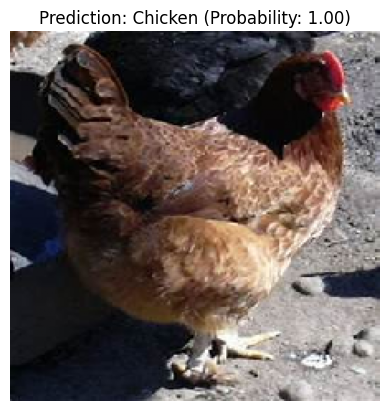

In [36]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np

# Directory paths
data_dir = pathlib.Path("destination_folder/train")

# Create a list of class names from subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

# Function to predict and plot the image with the predicted class
def pred_and_plot(model, filename, class_names=class_names):
    """
    Import an image located at filename, make a prediction with model,
    and plot the image with the prediction class as the title.
    """
    # Import the target image and preprocess it
    img = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img)

    # Make a prediction
    pred = make_prediction(model, filename)

    # Get the prediction class index and map it to the class name
    pred_class_index = tf.argmax(pred[0]).numpy()
    pred_class = class_names[pred_class_index]
    pred_prob = pred[0][pred_class_index]

    # Plot the image and predicted class
    plt.figure()
    plt.imshow(img_array.astype('uint8') / 255.0)
    plt.title(f"Prediction: {pred_class} (Probability: {pred_prob:.2f})")
    plt.axis(False)
    plt.show()

pred_and_plot(model_0, image_path)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to your shared folder in Google Drive
folder_path = '/content/drive/My Drive/animal_images'
os.listdir(folder_path)


In [ ]:
# Install gdown if not already installed
!pip install gdown

# Use gdown to download the file
import gdown

file_id = '16l5Lqscx0eybuEr5E3w1rp4xYqd4TrT5'
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'my_folder.zip', quiet=False)

# Unzip the downloaded file
!unzip my_folder.zip -d destination_folder


In [ ]:
!unzip my_folder.zip -d destination_folder


In [ ]:
image_path ="destination_folder/animal_images/Zebra.jpg"
pred_and_plot(model_0, image_path)

In [ ]:
model_0.export("animal_model.h5")